<a href="https://colab.research.google.com/github/davidzillion/Fashion_MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Fashion MNIST dataset

Tutorial source: https://www.tensorflow.org/tutorials/keras/classification

Convolutional Neural Networks: https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

The Fashion MNIST dataset is a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

**Label:**	**Class**

0:    T-shirt/top

1:    Trouser

2:    Pullover

3:    Dress

4:    Coat

5:    Sandal

6:    Shirt

7:    Sneaker

8:    Bag

9:    Ankle boot

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploration

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that it is a boot represented in a scale of grays:

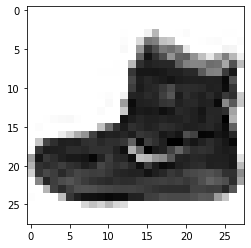

In [ ]:
item = train_images[0]
plt.imshow(item, cmap=plt.cm.binary)
plt.show()

The pixel values fall in the range of 0 to 255:

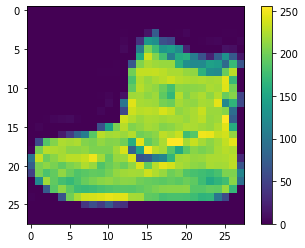

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

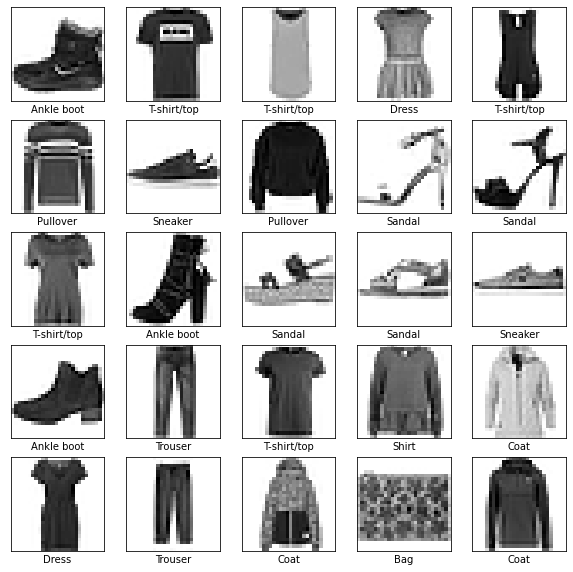

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Your task:

Build a simple Sequential neural network that classifies the images.

Challenge: avhieve a test accuracy above 87%

In [ ]:
# The convolutional layer will need the input to have 4 dimensions
# (info about how many channels the images have: in our case, just 1)
train_images=train_images.reshape(60000, 28, 28, 1)
train_images.shape

test_images=test_images.reshape(10000, 28, 28, 1)
test_images.shape

(10000, 28, 28, 1)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2220 - accuracy: 0.6813
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6676 - accuracy: 0.7474
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5854 - accuracy: 0.7970
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5483 - accuracy: 0.8121
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5243 - accuracy: 0.8192
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5133 - accuracy: 0.8237
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5143 - accuracy: 0.8241
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5022 - accuracy: 0.8259
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4898 - accuracy: 0.8309
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.498

In [ ]:
test_results = {}

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

test_results["nn_model"] = test_acc*100

test_results

{'nn_model': 81.51999711990356}

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

array([2.2484369e-13, 1.4144041e-08, 0.0000000e+00, 4.4682158e-10,
       0.0000000e+00, 5.3493261e-02, 4.0030699e-24, 9.5330775e-02,
       6.4736398e-12, 8.5117596e-01], dtype=float32)

In [ ]:
print(np.argmax(predictions[0]))
print(test_labels[0])


9
9


### Verifying predictions

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
# The convolutional layer will need the input to have 4 dimensions
# (info about how many channels the images have: in our case, just 1)
# train_images=train_images.reshape(60000, 28, 28, 1)
# train_images.shape

test_images=test_images.reshape(10000, 28, 28)
test_images.shape

(10000, 28, 28)

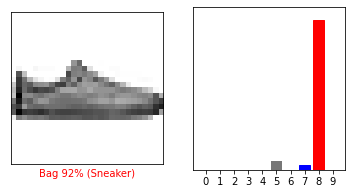

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

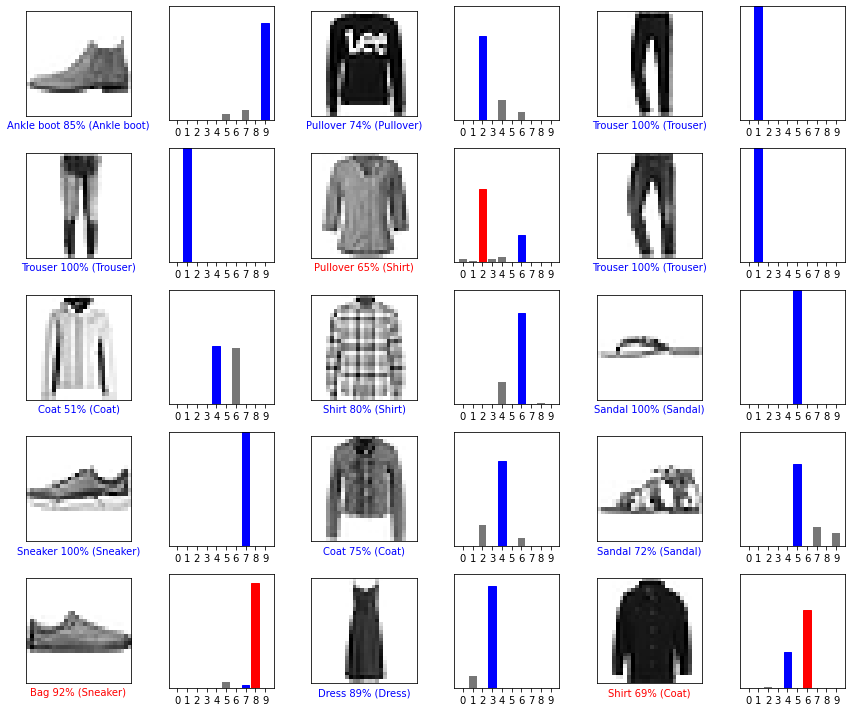

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Adding Convolutions and Pooling

In [ ]:
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=(3, 3), 
                         activation='relu', 
                         input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), 
                               strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.8694 - accuracy: 0.8563
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2767 - accuracy: 0.9008
Epoch 3/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2384 - accuracy: 0.9120
Epoch 4/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2153 - accuracy: 0.9206
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1949 - accuracy: 0.9285


In [ ]:
# The convolutional layer will need the input to have 4 dimensions
# (info about how many channels the images have: in our case, just 1)
# train_images=train_images.reshape(60000, 28, 28, 1)
# train_images.shape
# (how many pictures, pixels,pixels, depth(how many colors))
test_images=test_images.reshape(10000, 28, 28, 1)
test_images.shape

(10000, 28, 28, 1)

In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=0)

test_results["cnn_model"] = test_acc*100

test_results

{'cnn_model': 89.16000127792358, 'nn_model': 81.51999711990356}

In [ ]:
# Saving the model (the weights)
cnn_model.save_weights('models/fashion_cnn_model')

In [ ]:
# Create a new model instance
loaded_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=(3, 3), 
                         activation='relu', 
                         input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), 
                               strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

loaded_model.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

# Restore the weights
loaded_model.load_weights('models/fashion_cnn_model')

# Evaluate the model
loss, acc = loaded_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.3352 - accuracy: 0.8916


## Adding more convolutions and more pooling

In [ ]:
cnn_deep_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

cnn_deep_model.compile(optimizer='adam', 
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])

cnn_deep_model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [ ]:
cnn_deep_model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = cnn_deep_model.evaluate(test_images, test_labels, verbose=0)

Epoch 1/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.5340 - accuracy: 0.8357
Epoch 2/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.3229 - accuracy: 0.8809
Epoch 3/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2887 - accuracy: 0.8925
Epoch 4/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.2659 - accuracy: 0.9007
Epoch 5/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.2426 - accuracy: 0.9082


In [ ]:
test_results["cnn_deep_model"] = test_acc*100

test_results

{'cnn_deep_model': 88.81000280380249,
 'cnn_model': 89.16000127792358,
 'nn_model': 81.51999711990356}

In [ ]:
# Saving the model (the weights)
cnn_deep_model.save_weights('models/fashion_cnn_deep_model')

In [ ]:
# Create a new model instance
loaded_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

loaded_model.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

# Restore the weights
loaded_model.load_weights('models/fashion_cnn_deep_model')

# Evaluate the model
loss, acc = loaded_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.3186 - accuracy: 0.8881
